In [1]:
import pandas as pd

In [2]:
##READ DATA FILES

noteEvents = pd.read_csv("NOTEEVENTS.csv")
patients = pd.read_csv("PATIENTS.csv")
admissions = pd.read_csv("ADMISSIONS.csv")
#labEvents = pd.read_csv('LABEVENTS.csv')
#dict_labItems = pd.read_csv('D_LABITEMS.csv')
#chartEvents = pd.read_csv('CHARTEVENTS.csv')
#dict_Items = pd.read_csv('D_ITEMS.csv')
#diagnosesList = pd.read_csv('DIAGNOSES_ICD.csv')
#dict_diagnoses = pd.read_csv('D_ICD_DIAGNOSES.csv')
#drg_diag = pd.read_csv('DRGCODES.csv')
#procedureEvents = pd.read_csv('PROCEDURES_ICD.csv')
#dict_procedures = pd.read_csv('D_ICD_PROCEDURES.csv')
#prescriptions = pd.read_csv('PRESCRIPTIONS.csv')
#inputEvents_cv = pd.read_csv('INPUTEVENTS_CV.csv')
#inputEvents_mv = pd.read_csv('INPUTEVENTS_MV.csv')
#outputEvents = pd.read_csv('OUTPUTEVENTS.csv')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
##CREATING MASTER FILE
import numpy as np

master = admissions
master = master[['SUBJECT_ID', "ADMITTIME", "DISCHTIME", "ADMISSION_TYPE", "ADMISSION_LOCATION", "DIAGNOSIS"]]

choose = np.random.rand(len(master)) < 0.4
master = master[choose]
master

,SUBJECT_ID,ADMITTIME,DISCHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DIAGNOSIS
1,23,2153-09-03 07:15:00,2153-09-08 19:10:00,ELECTIVE,PHYS REFERRAL/NORMAL DELI,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...
2,23,2157-10-18 19:34:00,2157-10-25 14:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,BRAIN MASS
4,25,2160-11-02 02:06:00,2160-11-05 14:55:00,EMERGENCY,EMERGENCY ROOM ADMIT,ACUTE CORONARY SYNDROME
8,30,2172-10-14 14:17:00,2172-10-19 14:37:00,URGENT,TRANSFER FROM HOSP/EXTRAM,UNSTABLE ANGINA\CATH
9,31,2108-08-22 23:27:00,2108-08-30 15:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,STATUS EPILEPTICUS
10,32,2170-04-04 08:00:00,2170-04-23 12:45:00,ELECTIVE,PHYS REFERRAL/NORMAL DELI,TRACHEAL STENOSIS/SDA
12,34,2186-07-18 16:46:00,2186-07-20 16:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CHEST PAIN\CATH
15,36,2131-04-30 07:15:00,2131-05-08 14:00:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...
18,37,2183-08-21 16:48:00,2183-08-26 18:54:00,EMERGENCY,EMERGENCY ROOM ADMIT,CONGESTIVE HEART FAILURE
19,38,2166-08-10 00:28:00,2166-09-04 11:30:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,ACUTE MYOCARDIAL INFARCTION-SEPSIS


In [1]:
#combine input events files
inputEvents = pd.merge(inputEvents_cv, inputEvents_mv, how = 'outer', on = 'SUBJECT_ID')

NameError: name 'pd' is not defined

In [ ]:
##Assign labels (combine dictionary with originals)

#lab
lab = labEvents.merge(dict_labItems, how = 'inner', on = 'ITEMID')
lab = lab[['SUBJECT_ID', 'HADM_ID', 'ITEMID', 'LABEL', 'VALUE', 'VALUENUM', 'CATEGORY', 'CHARTTIME', 'FLAG']]
lab.to_csv('lab.csv', index = False)

#chart
chart = chartEvents.merge(dict_Items, how = 'inner', on = 'ITEMID')
chart = chart[chart['ERROR'] == 0]
chart = chart[['SUBJECT_ID', 'HADM_ID', 'ITEMID', 'LABEL', 'VALUE', 'VALUENUM', 'VALUEUOM', 'WARNING', 'CHARTTIME']]
chart.to_csv('chart.csv', index = False)

#diagnoses
diagnoses = diagnosesList.merge(dict_diagnoses, how = 'inner', on = 'ICD9_CODE')
diagnoses = diagnoses[['SUBJECT_ID', 'ICD9_CODE', 'SHORT_TITLE', 'LONG_TITLE']]
diagnoses.to_csv('diagnoses.csv', index = False)

#procedures
procedures = procedureEvents.merge(dict_procedures, how = 'inner', on = 'ICD9_CODE')
procedures = procedures[['SUBJECT_ID', 'ICD9_CODE', 'SHORT_TITLE', 'LONG_TITLE']]
procedures.to_csv('procedures.csv', index = False)

#input/output
inputs = inputEvents.merge(dict_Items, how = 'inner', on = 'ITEMID')
outputs = outputEvents.merge(dict_Items, how = 'inner', on = 'ITEMID')
inputs.to_csv('inputs.csv', index = False)
outputs.to_csv('outputs.csv', index = False)


In [4]:
##cutting note events to just the chosen patients

master_notes = pd.merge(master, noteEvents, how = 'left', on = 'SUBJECT_ID')
master_notes['TEXT'] = master_notes['TEXT'].astype(str)

master_notes['all text'] = master_notes[['SUBJECT_ID', 'TEXT']].groupby(['SUBJECT_ID'])['TEXT'].transform(lambda x: ', '.join(x))
master_notes = master_notes.drop_duplicates(subset = 'SUBJECT_ID', keep = 'first')

noteEvents = master_notes
noteEvents['TEXT'] = noteEvents['all text']

noteEvents

,SUBJECT_ID,ADMITTIME,DISCHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DIAGNOSIS,ROW_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT,all text
0,23,2153-09-03 07:15:00,2153-09-08 19:10:00,ELECTIVE,PHYS REFERRAL/NORMAL DELI,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,4310.0,152223.0,2153-09-08,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2153-9-3**] D...,Admission Date: [**2153-9-3**] D...
64,25,2160-11-02 02:06:00,2160-11-05 14:55:00,EMERGENCY,EMERGENCY ROOM ADMIT,ACUTE CORONARY SYNDROME,23085.0,129635.0,2160-11-05,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2160-11-2**] ...,Admission Date: [**2160-11-2**] ...
84,30,2172-10-14 14:17:00,2172-10-19 14:37:00,URGENT,TRANSFER FROM HOSP/EXTRAM,UNSTABLE ANGINA\CATH,11594.0,104557.0,2172-10-19,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2172-10-14**] Discha...,Admission Date: [**2172-10-14**] Discha...
99,31,2108-08-22 23:27:00,2108-08-30 15:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,STATUS EPILEPTICUS,10184.0,128652.0,2108-08-30,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2108-8-22**] Discharge...,Admission Date: [**2108-8-22**] Discharge...
133,32,2170-04-04 08:00:00,2170-04-23 12:45:00,ELECTIVE,PHYS REFERRAL/NORMAL DELI,TRACHEAL STENOSIS/SDA,10677.0,175413.0,2170-04-23,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2170-4-4**] Discharge ...,Admission Date: [**2170-4-4**] Discharge ...
166,34,2186-07-18 16:46:00,2186-07-20 16:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CHEST PAIN\CATH,27237.0,144319.0,2191-02-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2191-2-23**] ...,Admission Date: [**2191-2-23**] ...
200,36,2131-04-30 07:15:00,2131-05-08 14:00:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,7412.0,182104.0,2131-05-08,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2131-4-30**] ...,Admission Date: [**2131-4-30**] ...
289,37,2183-08-21 16:48:00,2183-08-26 18:54:00,EMERGENCY,EMERGENCY ROOM ADMIT,CONGESTIVE HEART FAILURE,6517.0,188670.0,2183-08-26,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2183-8-21**] Discharge...,Admission Date: [**2183-8-21**] Discharge...
304,38,2166-08-10 00:28:00,2166-09-04 11:30:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,ACUTE MYOCARDIAL INFARCTION-SEPSIS,24769.0,185910.0,2166-09-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2166-8-10**] ...,Admission Date: [**2166-8-10**] ...
433,41,2132-12-31 10:30:00,2133-01-27 15:45:00,ELECTIVE,PHYS REFERRAL/NORMAL DELI,RIGHT BRAIN STEM LESION/SDA,26891.0,101757.0,2133-01-27,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2132-12-31**] ...,Admission Date: [**2132-12-31**] ...


In [5]:
###DELIRIUM IN NOTE EVENTS

##Finding delirium using keywords in clinical notes 

def has_string(text, string):
    if string.lower() in text.lower():
        return True
    return False

noteEvents['delirium trigger'] = 0
noteEvents['supported'] = 0
triggerWords = ['deliri', 'hallucin', 'confus', 'reorient', 
                'disorient', 'encephalopathy']
supportingWords = ['forget', 'alarm', 'commands', 'out of bed', 
                   'impuls', 'narcotic', 'sleepy', 'agitat', 'anxious',
                   'anxiety', 'redirected', 'restless', 'letharg',
                   'refus', 'multifactorial', 'sedat', 'attent',
                   'somnolent', 'hypoactiv', 'fall', 'unrespons',
                   'combative', 'fluctu', 'distract', 'not cooperat',
                   'uncooperative', 'resist']

for i in noteEvents.index:
    for word in triggerWords: 
        if has_string(str(noteEvents['TEXT'][i]), word):
            noteEvents['delirium trigger'][i] = 1
    if noteEvents['delirium trigger'][i] == 1: 
        for string in supportingWords:
            if has_string(str(noteEvents['TEXT'][i]), string):
                noteEvents['supported'][i] = 1

                
noteEvents1 = noteEvents[['SUBJECT_ID', 'supported']]                
                
master = master.merge(noteEvents1, how = 'right', left_on = 'SUBJECT_ID', right_on = 'SUBJECT_ID')


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [14]:
###Conduct LDA on non-supported notes. 

##Preparing note text for LDA. 

import nltk

def removePunc(my_str): 
    # define punctuation
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    digits = '0123456789'

    # remove punctuation from the string
    no_punct = ""
    for char in my_str:
        if char not in punctuations and char not in digits:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct

def keepNounVerb(my_str):
    tokens = nltk.word_tokenize(my_str)
    tags = nltk.pos_tag(tokens)
    keep = [word for word, pos in tags if (pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS' 
                                           or pos == 'VB' or pos == 'VBG' or pos == 'VBD' or pos == 'VBN' or pos == 'VBP' or pos == 'VBZ')]
    space = ' '
    cleanedStr = space.join(keep)
    return cleanedStr

deliriumNotes = noteEvents[noteEvents['delirium trigger'] == 1]
LDANotes = deliriumNotes[deliriumNotes['supported'] == 0]
removeList = [' po ', ' qd ', ' mg', ' qam ', ' qpm ', ' is ', ' OM ']

##Cleaning notes text

LDANotes['CLEANED TEXT'] = ""

for i in LDANotes.index: 
    note = LDANotes['TEXT'][i]
    note = note[note.find('Service'):]
    note = note[:note.find('First Name')]
    note = note.replace('/n', ' ')
    note = removePunc(note)
    note = keepNounVerb(note)
    for word in removeList:
        note = note.replace(word, " ")
    LDANotes['CLEANED TEXT'][i] = note

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pan

,SUBJECT_ID,ADMITTIME,DISCHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DIAGNOSIS,supported
0,23,2153-09-03 07:15:00,2153-09-08 19:10:00,ELECTIVE,PHYS REFERRAL/NORMAL DELI,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,1
1,23,2157-10-18 19:34:00,2157-10-25 14:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,BRAIN MASS,1
2,25,2160-11-02 02:06:00,2160-11-05 14:55:00,EMERGENCY,EMERGENCY ROOM ADMIT,ACUTE CORONARY SYNDROME,0
3,30,2172-10-14 14:17:00,2172-10-19 14:37:00,URGENT,TRANSFER FROM HOSP/EXTRAM,UNSTABLE ANGINA\CATH,1
4,31,2108-08-22 23:27:00,2108-08-30 15:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,STATUS EPILEPTICUS,1
5,32,2170-04-04 08:00:00,2170-04-23 12:45:00,ELECTIVE,PHYS REFERRAL/NORMAL DELI,TRACHEAL STENOSIS/SDA,0
6,34,2186-07-18 16:46:00,2186-07-20 16:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CHEST PAIN\CATH,0
7,36,2131-04-30 07:15:00,2131-05-08 14:00:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,1
8,37,2183-08-21 16:48:00,2183-08-26 18:54:00,EMERGENCY,EMERGENCY ROOM ADMIT,CONGESTIVE HEART FAILURE,1
9,38,2166-08-10 00:28:00,2166-09-04 11:30:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,ACUTE MYOCARDIAL INFARCTION-SEPSIS,0


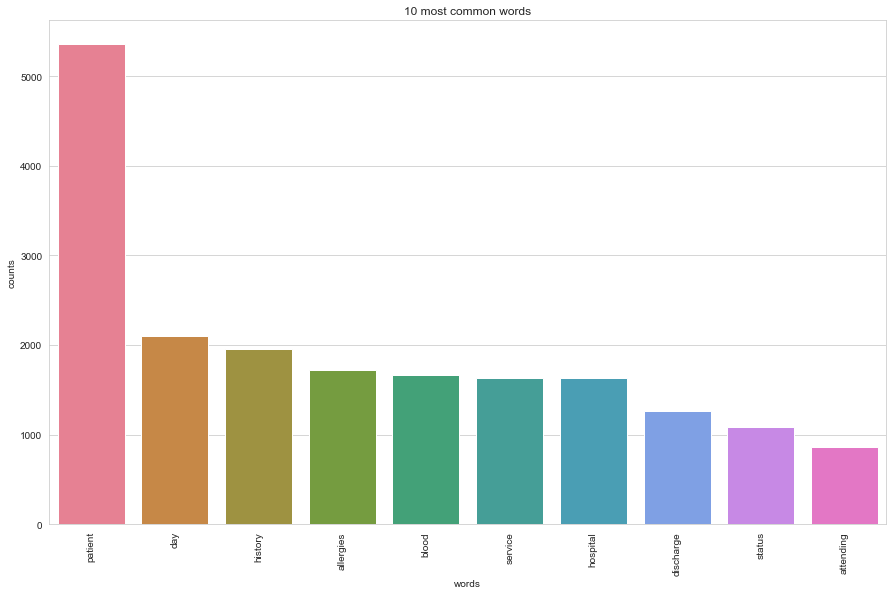

In [15]:
###Visual Plot of top ten words in these notes. 

# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Plotting 10 most common words
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(LDANotes['CLEANED TEXT'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [17]:
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(LDANotes['CLEANED TEXT'])

# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 5
number_words = 30

# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
adverse reactions drug pt morphine sw heparin agents bactrim husband ni lisinopril hospital inhibitors states support son elder nsaids service percocet lipitor injuries amoxicillin report ck contrast abuse ativan lives

Topic #1:
pt po blood pm hospital tablet sig hct daily given plan history bp pain wbc sp ct bleeding home denies response gtt osh bleed started action assessment capsule noted hr

Topic #2:
allergies service attending medicine known patient having drugs recorded surgery penicillins cardiothoracic iodine sulfa drug codeine aspirin antibiotics containing neurosurgery sulfonamides sulfonamide med vancomycin attendingdoctor shellfish demerol neurology ace erythromycin

Topic #3:
patient day history hospital blood discharge status patients admission disease left post care medications showed time continued service course artery pressure pain examination rate unit bid heart transferred chest started

Topic #4:
blood day ct hct tablet life infan

In [7]:
####DELIRIUM IN DIAGNOSES (THROUGH ICD-9 CODES)

#Diagnoses file filtered through Excel for Delirium: 
deliriumDiag = pd.read_csv('deliriumDiagnoses.csv')


#indicate delirium diagnosed in master file
master2 = master
master2 = pd.merge(master2, deliriumDiag, how = 'left', left_on = 'SUBJECT_ID', right_on = 'SUBJECT_ID')


master2['SHORT_TITLE'] = master2['SHORT_TITLE'].astype(str)
master2['all diag'] = master2[['SUBJECT_ID', 'SHORT_TITLE']].groupby(['SUBJECT_ID'])['SHORT_TITLE'].transform(lambda x: ', '.join(x))
master2 = master2.drop_duplicates(subset = 'SUBJECT_ID', keep = 'first')


master2['icd delirium'] = 0
for i in master2.index:
    if pd.isna(master2['ICD9_CODE'][i]):
        master2['icd delirium'][i] = 0
    else:
        master2['icd delirium'][i] = 1

master2 = master2[['SUBJECT_ID', 'icd delirium']] 
master = master.merge(master2, how = 'left', left_on = 'SUBJECT_ID', right_on = 'SUBJECT_ID')
    

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [8]:
master


,SUBJECT_ID,ADMITTIME,DISCHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DIAGNOSIS,supported,icd delirium
0,23,2153-09-03 07:15:00,2153-09-08 19:10:00,ELECTIVE,PHYS REFERRAL/NORMAL DELI,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,1,0
1,23,2157-10-18 19:34:00,2157-10-25 14:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,BRAIN MASS,1,0
2,25,2160-11-02 02:06:00,2160-11-05 14:55:00,EMERGENCY,EMERGENCY ROOM ADMIT,ACUTE CORONARY SYNDROME,0,0
3,30,2172-10-14 14:17:00,2172-10-19 14:37:00,URGENT,TRANSFER FROM HOSP/EXTRAM,UNSTABLE ANGINA\CATH,1,0
4,31,2108-08-22 23:27:00,2108-08-30 15:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,STATUS EPILEPTICUS,1,0
5,32,2170-04-04 08:00:00,2170-04-23 12:45:00,ELECTIVE,PHYS REFERRAL/NORMAL DELI,TRACHEAL STENOSIS/SDA,0,0
6,34,2186-07-18 16:46:00,2186-07-20 16:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CHEST PAIN\CATH,0,0
7,36,2131-04-30 07:15:00,2131-05-08 14:00:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,1,0
8,37,2183-08-21 16:48:00,2183-08-26 18:54:00,EMERGENCY,EMERGENCY ROOM ADMIT,CONGESTIVE HEART FAILURE,1,0
9,38,2166-08-10 00:28:00,2166-09-04 11:30:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,ACUTE MYOCARDIAL INFARCTION-SEPSIS,0,0


In [9]:
##CREATING FINAL DELIRIUM COLUMN

master['delirium'] = 0
for i in master.index:
    if master['supported'][i] == 1 or master['icd delirium'][i] == 1:
        master['delirium'][i] = 1

        
master = master.drop(columns = ['icd delirium', 'supported'])
master = master.drop_duplicates(subset = 'SUBJECT_ID')
        
master.to_csv('master.csv', index = False)       
master

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,SUBJECT_ID,ADMITTIME,DISCHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DIAGNOSIS,delirium
0,23,2153-09-03 07:15:00,2153-09-08 19:10:00,ELECTIVE,PHYS REFERRAL/NORMAL DELI,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,1
1,23,2157-10-18 19:34:00,2157-10-25 14:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,BRAIN MASS,1
2,25,2160-11-02 02:06:00,2160-11-05 14:55:00,EMERGENCY,EMERGENCY ROOM ADMIT,ACUTE CORONARY SYNDROME,0
3,30,2172-10-14 14:17:00,2172-10-19 14:37:00,URGENT,TRANSFER FROM HOSP/EXTRAM,UNSTABLE ANGINA\CATH,1
4,31,2108-08-22 23:27:00,2108-08-30 15:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,STATUS EPILEPTICUS,1
5,32,2170-04-04 08:00:00,2170-04-23 12:45:00,ELECTIVE,PHYS REFERRAL/NORMAL DELI,TRACHEAL STENOSIS/SDA,0
6,34,2186-07-18 16:46:00,2186-07-20 16:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CHEST PAIN\CATH,0
7,36,2131-04-30 07:15:00,2131-05-08 14:00:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,1
8,37,2183-08-21 16:48:00,2183-08-26 18:54:00,EMERGENCY,EMERGENCY ROOM ADMIT,CONGESTIVE HEART FAILURE,1
9,38,2166-08-10 00:28:00,2166-09-04 11:30:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,ACUTE MYOCARDIAL INFARCTION-SEPSIS,0


In [18]:
master[master['delirium'] == 1]

,SUBJECT_ID,ADMITTIME,DISCHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DIAGNOSIS,delirium
0,23,2153-09-03 07:15:00,2153-09-08 19:10:00,ELECTIVE,PHYS REFERRAL/NORMAL DELI,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,1
3,30,2172-10-14 14:17:00,2172-10-19 14:37:00,URGENT,TRANSFER FROM HOSP/EXTRAM,UNSTABLE ANGINA\CATH,1
4,31,2108-08-22 23:27:00,2108-08-30 15:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,STATUS EPILEPTICUS,1
7,36,2131-04-30 07:15:00,2131-05-08 14:00:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,1
8,37,2183-08-21 16:48:00,2183-08-26 18:54:00,EMERGENCY,EMERGENCY ROOM ADMIT,CONGESTIVE HEART FAILURE,1
11,357,2198-08-02 04:49:00,2198-10-26 14:55:00,EMERGENCY,EMERGENCY ROOM ADMIT,SEIZURE,1
19,368,2137-07-11 17:56:00,2137-07-16 16:00:00,EMERGENCY,EMERGENCY ROOM ADMIT,PNEUMONIA,1
22,372,2114-07-08 17:22:00,2114-07-16 16:00:00,EMERGENCY,EMERGENCY ROOM ADMIT,SUBARACHNOID HEMORRHAGE,1
23,44,2192-11-19 18:14:00,2192-11-27 14:35:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,CORONARY ARTERY DISEASE\CATH,1
27,52,2191-01-10 02:12:00,2191-01-19 16:10:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,SEIZURES,1


In [15]:
master

,SUBJECT_ID,ADMITTIME,DISCHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DIAGNOSIS,delirium
0,23,2153-09-03 07:15:00,2153-09-08 19:10:00,ELECTIVE,PHYS REFERRAL/NORMAL DELI,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,1
2,25,2160-11-02 02:06:00,2160-11-05 14:55:00,EMERGENCY,EMERGENCY ROOM ADMIT,ACUTE CORONARY SYNDROME,0
3,30,2172-10-14 14:17:00,2172-10-19 14:37:00,URGENT,TRANSFER FROM HOSP/EXTRAM,UNSTABLE ANGINA\CATH,1
4,31,2108-08-22 23:27:00,2108-08-30 15:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,STATUS EPILEPTICUS,1
5,32,2170-04-04 08:00:00,2170-04-23 12:45:00,ELECTIVE,PHYS REFERRAL/NORMAL DELI,TRACHEAL STENOSIS/SDA,0
6,34,2186-07-18 16:46:00,2186-07-20 16:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CHEST PAIN\CATH,0
7,36,2131-04-30 07:15:00,2131-05-08 14:00:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,1
8,37,2183-08-21 16:48:00,2183-08-26 18:54:00,EMERGENCY,EMERGENCY ROOM ADMIT,CONGESTIVE HEART FAILURE,1
9,38,2166-08-10 00:28:00,2166-09-04 11:30:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,ACUTE MYOCARDIAL INFARCTION-SEPSIS,0
10,41,2132-12-31 10:30:00,2133-01-27 15:45:00,ELECTIVE,PHYS REFERRAL/NORMAL DELI,RIGHT BRAIN STEM LESION/SDA,0
